# Prediction on to generate the power for specified duration

1. We can use the all provided data sets 
2. Analyze the all data sets and apply the Data mining techniques
3. Concatinat the data sets based on the commonaly identified observation.
4. Apply the train- test split, feature selection, OLS etc.
5. Develop the Linear regression model with the multiple iterations , while adding more observations to monitor
    overall progress , performance of model.
6. Select one of the best model ,based on the metrics generated by the model and corresponds on the observations.
7. Learn the statistical terminologies to take inferences from it.
8. Co relation matrix will help to learn the find out the highly co related attributes within the observations.
9. Find out the error term , based on the final model and apply actual v/s prediction result.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
energy = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/power_actual.csv")

In [4]:
energy.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [5]:
energy.shape

(70080, 5)

In [6]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 5 columns):
Unnamed: 0    70080 non-null int64
datetime      70080 non-null object
ghi           35040 non-null float64
gti           35040 non-null float64
power         70080 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.7+ MB


In [7]:
energy.describe()

,Unnamed: 0,ghi,gti,power
count,70080.000000,35040.0,35040.0,70080.000000
mean,35039.500000,0.0,0.0,28.612915
std,20230.497769,0.0,0.0,498.795887
min,0.000000,0.0,0.0,0.000000
25%,17519.750000,0.0,0.0,0.000000
50%,35039.500000,0.0,0.0,0.000000
75%,52559.250000,0.0,0.0,5.540000
max,70079.000000,0.0,0.0,16172.040000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Converting date to Pandas datetime format
energy['datetime'] = pd.to_datetime(energy['datetime'])

In [10]:
energy.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [20]:
energy.isnull().sum()

Unnamed: 0        0
datetime          0
ghi           35040
gti           35040
power             0
dtype: int64

In [21]:
# Checking the percentage of missing values
round(100*(energy.isnull().sum()/len(energy.index)), 2)

Unnamed: 0     0.0
datetime       0.0
ghi           50.0
gti           50.0
power          0.0
dtype: float64

In [22]:
energy = energy[~np.isnan(energy['ghi'])]

In [23]:
energy = energy[~np.isnan(energy['gti'])]

In [24]:
# Checking percentage of missing values after removing the missing values
round(100*(energy.isnull().sum()/len(energy.index)), 2)

Unnamed: 0    0.0
datetime      0.0
ghi           0.0
gti           0.0
power         0.0
dtype: float64

In [32]:
wa = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/weather_actuals.csv")

In [33]:
wa.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [34]:
wa.shape

(13619, 31)

In [35]:
wa.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,3744.0,...,3744.0,13619.000000,3744.0,3744.0,3744.0,13619.000000,3744.0,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,-314.005310,25.944639,24.498054,0.537411,11.924626,-498.677363,-540.808704,-9999.0,...,-9999.0,-2394.989280,-9999.0,-9999.0,-9999.0,-2187.730797,-9999.0,-2396.367775,-2396.398081,-117.086149
std,3931.610993,0.0,1744.610028,10.469808,8.840016,0.498617,9.129459,2557.943872,2267.247300,0.0,...,0.0,4269.320576,0.0,0.0,0.0,4385.706548,0.0,4268.545854,4268.528833,1130.763316
min,0.000000,1.0,-9999.000000,3.140000,5.000000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.0,...,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,79.000000,1.620000,-9999.0,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,236.900000,-9999.0,0.000000,0.000000,3.540000
50%,6809.000000,1.0,0.000000,25.540000,25.000000,1.000000,10.710000,149.000000,2.410000,-9999.0,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,270.800000,-9999.0,0.000000,0.000000,16.090000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,-9999.0,...,-9999.0,2.000000,-9999.0,-9999.0,-9999.0,280.800000,-9999.0,0.000000,0.000000,16.090000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,-9999.0,...,-9999.0,12.000000,-9999.0,-9999.0,-9999.0,351.700000,-9999.0,6.220000,0.730000,16.090000


In [36]:
wf = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/weather_forecast.csv")

In [37]:
wf.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [38]:
wf.shape

(648, 31)

In [39]:
wf.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,648.000000,648.0,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,0.0,...,0.0,648.000000,0.0,0.0,0.0,648.000000,0.0,648.000000,648.000000,6.480000e+02
mean,323.500000,1.0,0.140340,27.562423,27.302469,0.513889,14.789244,144.282407,2.214614,NaN,...,NaN,1.591049,NaN,NaN,NaN,275.790432,NaN,0.007608,0.002423,1.609000e+01
std,187.205769,0.0,0.273487,4.596587,4.535063,0.500193,3.616508,116.665398,0.756552,NaN,...,NaN,2.451580,NaN,NaN,NaN,3.228630,NaN,0.032064,0.006543,1.102192e-13
min,0.000000,1.0,0.000000,18.300000,18.000000,0.000000,2.950000,0.000000,0.600000,NaN,...,NaN,0.000000,NaN,NaN,NaN,262.800000,NaN,0.000000,0.000000,1.609000e+01
25%,161.750000,1.0,0.000000,23.817500,24.000000,0.000000,12.620000,51.750000,1.700000,NaN,...,NaN,0.000000,NaN,NaN,NaN,274.300000,NaN,0.000000,0.000000,1.609000e+01
50%,323.500000,1.0,0.000000,27.155000,27.000000,1.000000,14.900000,109.000000,2.175000,NaN,...,NaN,0.000000,NaN,NaN,NaN,276.100000,NaN,0.000000,0.000000,1.609000e+01
75%,485.250000,1.0,0.110000,31.942500,32.000000,1.000000,17.182500,273.500000,2.682500,NaN,...,NaN,3.000000,NaN,NaN,NaN,277.600000,NaN,0.000000,0.000000,1.609000e+01
max,647.000000,1.0,1.000000,36.340000,36.000000,1.000000,22.350000,359.000000,4.430000,NaN,...,NaN,8.000000,NaN,NaN,NaN,284.900000,NaN,0.420000,0.060000,1.609000e+01


### Combining all data files into one consolidated dataframe

In [40]:
# Merging on 'customerID'
df = pd.merge(wa, wf, how='inner', on='temperature')

In [43]:
df.head()

,Unnamed: 0_x,plant_id_x,datetime_utc_x,datetime_local_x,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,...,precip_accumulation_y,precip_intensity_y,precip_probability_y,precip_type_y,visibility_y,sunrise_y,sunset_y,icon_y,summary_y,updated_at_y
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,NaN,0.00,0.00,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,NaN,0.00,0.00,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,clear-night,Clear,2019-10-02 23:32:38
2,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,NaN,0.00,0.00,NaN,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
3,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,NaN,0.00,0.00,NaN,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
4,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,NaN,0.05,0.01,rain,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-day,Clear,2019-10-03 23:32:40


In [44]:
df.describe()

,Unnamed: 0_x,plant_id_x,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,wind_speed_x,wind_chill_x,...,qpf_y,uv_index_y,snow_y,pop_y,fctcode_y,ozone_y,precip_accumulation_y,precip_intensity_y,precip_probability_y,visibility_y
count,317905.000000,317905.0,317905.000000,317905.000000,317905.000000,317905.000000,317905.000000,317905.000000,317905.000000,71021.0,...,0.0,317905.000000,0.0,0.0,0.0,317905.000000,0.0,317905.000000,317905.000000,3.179050e+05
mean,7058.332077,1.0,-166.839072,29.581311,27.583561,0.500986,14.787939,-289.606817,-406.121777,-9999.0,...,NaN,1.684632,NaN,NaN,NaN,275.807003,NaN,0.007894,0.002472,1.609000e+01
std,4153.966795,0.0,1281.830665,6.528744,4.349432,0.500000,8.930587,2130.270164,1980.554733,0.0,...,NaN,2.502350,NaN,NaN,NaN,3.240178,NaN,0.033420,0.006703,7.291956e-11
min,0.000000,1.0,-9999.000000,17.500000,18.000000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.0,...,NaN,0.000000,NaN,NaN,NaN,262.800000,NaN,0.000000,0.000000,1.609000e+01
25%,3972.000000,1.0,0.000000,24.130000,24.000000,0.000000,7.700000,80.000000,1.810000,-9999.0,...,NaN,0.000000,NaN,NaN,NaN,274.300000,NaN,0.000000,0.000000,1.609000e+01
50%,6240.000000,1.0,0.020000,28.480000,27.000000,1.000000,15.580000,136.000000,2.570000,-9999.0,...,NaN,0.000000,NaN,NaN,NaN,276.100000,NaN,0.000000,0.000000,1.609000e+01
75%,10977.000000,1.0,0.550000,34.180000,32.000000,1.000000,23.190000,286.000000,3.480000,-9999.0,...,NaN,3.000000,NaN,NaN,NaN,277.600000,NaN,0.000000,0.000000,1.609000e+01
max,13618.000000,1.0,1.000000,49.640000,36.000000,1.000000,28.350000,359.000000,9.730000,-9999.0,...,NaN,8.000000,NaN,NaN,NaN,284.900000,NaN,0.420000,0.060000,1.609000e+01


In [45]:
df.isnull().sum()

Unnamed: 0_x                   0
plant_id_x                     0
datetime_utc_x                 0
datetime_local_x               0
cloud_cover_x                  0
apparent_temperature_x         0
temperature                    0
humidity_x                     0
dew_point_x                    0
wind_bearing_x                 0
wind_speed_x                   0
wind_chill_x              246884
wind_gust_x                    0
heat_index_x              246884
pressure_x                     0
qpf_x                     246884
uv_index_x                     0
snow_x                    246884
pop_x                     246884
fctcode_x                 246884
ozone_x                        0
precip_accumulation_x     246884
precip_intensity_x             0
precip_probability_x           0
precip_type_x             166212
visibility_x                   0
sunrise_x                      0
sunset_x                       0
icon_x                         0
summary_x                      0
          

In [46]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Unnamed: 0_x                0.00
plant_id_x                  0.00
datetime_utc_x              0.00
datetime_local_x            0.00
cloud_cover_x               0.00
apparent_temperature_x      0.00
temperature                 0.00
humidity_x                  0.00
dew_point_x                 0.00
wind_bearing_x              0.00
wind_speed_x                0.00
wind_chill_x               77.66
wind_gust_x                 0.00
heat_index_x               77.66
pressure_x                  0.00
qpf_x                      77.66
uv_index_x                  0.00
snow_x                     77.66
pop_x                      77.66
fctcode_x                  77.66
ozone_x                     0.00
precip_accumulation_x      77.66
precip_intensity_x          0.00
precip_probability_x        0.00
precip_type_x              52.28
visibility_x                0.00
sunrise_x                   0.00
sunset_x                    0.00
icon_x                      0.00
summary_x                   0.00
          

#### Handling the missing, NA values

In [50]:
df = df[~np.isnan(df['wind_chill_x'])]
df = df[~np.isnan(df['heat_index_x'])]
df = df[~np.isnan(df['qpf_x'])]
df = df[~np.isnan(df['snow_x'])]
df = df[~np.isnan(df['pop_x'])]
df = df[~np.isnan(df['pop_x'])]
df = df[~np.isnan(df['fctcode_x'])]
df = df[~np.isnan(df['precip_accumulation_x'])]
#df = df[~np.isnan(df['precip_type_x'])]
#df = df[~np.isnan(df['precip_type_y'])]

In [51]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Unnamed: 0_x                0.00
plant_id_x                  0.00
datetime_utc_x              0.00
datetime_local_x            0.00
cloud_cover_x               0.00
apparent_temperature_x      0.00
temperature                 0.00
humidity_x                  0.00
dew_point_x                 0.00
wind_bearing_x              0.00
wind_speed_x                0.00
wind_chill_x                0.00
wind_gust_x                 0.00
heat_index_x                0.00
pressure_x                  0.00
qpf_x                       0.00
uv_index_x                  0.00
snow_x                      0.00
pop_x                       0.00
fctcode_x                   0.00
ozone_x                     0.00
precip_accumulation_x       0.00
precip_intensity_x          0.00
precip_probability_x        0.00
precip_type_x               0.00
visibility_x                0.00
sunrise_x                   0.00
sunset_x                    0.00
icon_x                      0.00
summary_x                   0.00
          

### Dropping the observations which have 100% null significance 

In [53]:
df.drop('wind_chill_y', axis=1, inplace=True)

In [54]:
df.drop('heat_index_y', axis=1, inplace=True)

In [55]:
df.drop('qpf_y', axis=1, inplace=True)

In [56]:
df.drop('snow_y', axis=1, inplace=True)

In [57]:
df.drop('pop_y', axis=1, inplace=True)

In [58]:
df.drop('fctcode_y', axis=1, inplace=True)

In [59]:
df.drop('precip_accumulation_y', axis=1, inplace=True)

In [60]:
df.drop('precip_type_y', axis=1, inplace=True)

In [61]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)


Unnamed: 0_x              0.0
plant_id_x                0.0
datetime_utc_x            0.0
datetime_local_x          0.0
cloud_cover_x             0.0
apparent_temperature_x    0.0
temperature               0.0
humidity_x                0.0
dew_point_x               0.0
wind_bearing_x            0.0
wind_speed_x              0.0
wind_chill_x              0.0
wind_gust_x               0.0
heat_index_x              0.0
pressure_x                0.0
qpf_x                     0.0
uv_index_x                0.0
snow_x                    0.0
pop_x                     0.0
fctcode_x                 0.0
ozone_x                   0.0
precip_accumulation_x     0.0
precip_intensity_x        0.0
precip_probability_x      0.0
precip_type_x             0.0
visibility_x              0.0
sunrise_x                 0.0
sunset_x                  0.0
icon_x                    0.0
summary_x                 0.0
updated_at_x              0.0
Unnamed: 0_y              0.0
plant_id_y                0.0
datetime_u

In [83]:
df.head()

,Unnamed: 0_x,plant_id_x,datetime_utc_x,datetime_local_x,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,...,uv_index_y,ozone_y,precip_intensity_y,precip_probability_y,visibility_y,sunrise_y,sunset_y,icon_y,summary_y,updated_at_y
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,268.6,0.00,0.00,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,276.1,0.00,0.00,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,clear-night,Clear,2019-10-02 23:32:38
2,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,275.6,0.00,0.00,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
3,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,275.6,0.00,0.00,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
4,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,1,278.6,0.05,0.01,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-day,Clear,2019-10-03 23:32:40


In [86]:
# Plotting boxplot to check the defined variables and significance with respect to different statistical points.
plt.figure(figsize=(300,80))
sns.boxplot(x = 'updated_at_y', y='temperature',hue ='wind_bearing_x',data =df)
plt.show()

In [136]:
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Splitting the data into train-test 

In [137]:
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size=0.7,test_size=0.3,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(49714, 53)
(21307, 53)


In [138]:
df.head()

,Unnamed: 0_x,plant_id_x,datetime_utc_x,datetime_local_x,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,...,uv_index_y,ozone_y,precip_intensity_y,precip_probability_y,visibility_y,sunrise_y,sunset_y,icon_y,summary_y,updated_at_y
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,268.6,0.00,0.00,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,276.1,0.00,0.00,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,clear-night,Clear,2019-10-02 23:32:38
2,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,275.6,0.00,0.00,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
3,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,0,275.6,0.00,0.00,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-night,Clear,2019-10-03 23:32:40
4,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,...,1,278.6,0.05,0.01,16.09,2019-10-02 00:52:19,2019-10-02 12:44:31,clear-day,Clear,2019-10-03 23:32:40


### Rescaling the features

In [139]:
scaler = MinMaxScaler()

num_vars = ['cloud_cover_x','apparent_temperature_x','temperature','humidity_x','dew_point_x','wind_bearing_x','uv_index_y',
             'ozone_y','precip_intensity_y','precip_probability_y','visibility_y']

# Fit on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Unnamed: 0_x,plant_id_x,datetime_utc_x,datetime_local_x,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,...,uv_index_y,ozone_y,precip_intensity_y,precip_probability_y,visibility_y,sunrise_y,sunset_y,icon_y,summary_y,updated_at_y
47452,1386,1,2017-11-27 12:30:00,2017-11-27 18:00:00,0.999903,0.244681,0.277778,0.0,0.482611,0.993049,...,0.000,0.647059,0.023810,0.166667,0.0,2019-10-12 00:57:52,2019-10-12 12:33:01,clear-day,Clear,2019-10-13 23:33:19
222586,3612,1,2018-03-07 06:30:00,2018-03-07 12:00:00,0.999900,0.515957,0.555556,0.0,0.374410,0.994014,...,0.375,0.529412,0.190476,0.500000,0.0,2019-10-04 00:53:23,2019-10-04 12:42:09,cloudy,Overcast,2019-10-05 23:32:38
117087,3524,1,2018-02-24 14:30:00,2018-02-24 20:00:00,0.999939,0.364603,0.388889,1.0,0.740661,0.975768,...,0.000,0.687783,0.000000,0.000000,0.0,2019-10-09 00:56:08,2019-10-09 12:36:22,clear-night,Clear,2019-10-10 23:32:40
255026,180,1,2017-10-08 06:30:00,2017-10-08 12:00:00,0.999900,0.869439,0.833333,0.0,0.893517,0.967851,...,0.250,0.438914,0.000000,0.000000,0.0,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-day,Mostly Cloudy,2019-10-02 23:32:38
136102,10,1,2017-10-01 04:30:00,2017-10-01 10:00:00,0.999900,0.701644,0.722222,0.0,0.835122,0.992470,...,0.750,0.380090,0.047619,0.166667,0.0,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-day,Mostly Cloudy,2019-10-02 23:32:38


In [140]:
df_train[num_vars].describe()

,cloud_cover_x,apparent_temperature_x,temperature,humidity_x,dew_point_x,wind_bearing_x,uv_index_y,ozone_y,precip_intensity_y,precip_probability_y,visibility_y
count,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.000000,49714.0
mean,0.922833,0.376938,0.395794,0.407491,0.581612,0.786448,0.109687,0.581581,0.014460,0.036878,0.0
std,0.266697,0.199298,0.217038,0.491372,0.229020,0.398657,0.234538,0.146979,0.064867,0.105295,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.999900,0.236460,0.222222,0.000000,0.373551,0.970168,0.000000,0.511312,0.000000,0.000000,0.0
50%,0.999900,0.319632,0.333333,0.000000,0.607128,0.991408,0.000000,0.601810,0.000000,0.000000,0.0
75%,0.999900,0.492263,0.500000,1.000000,0.781022,0.994497,0.125000,0.669683,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


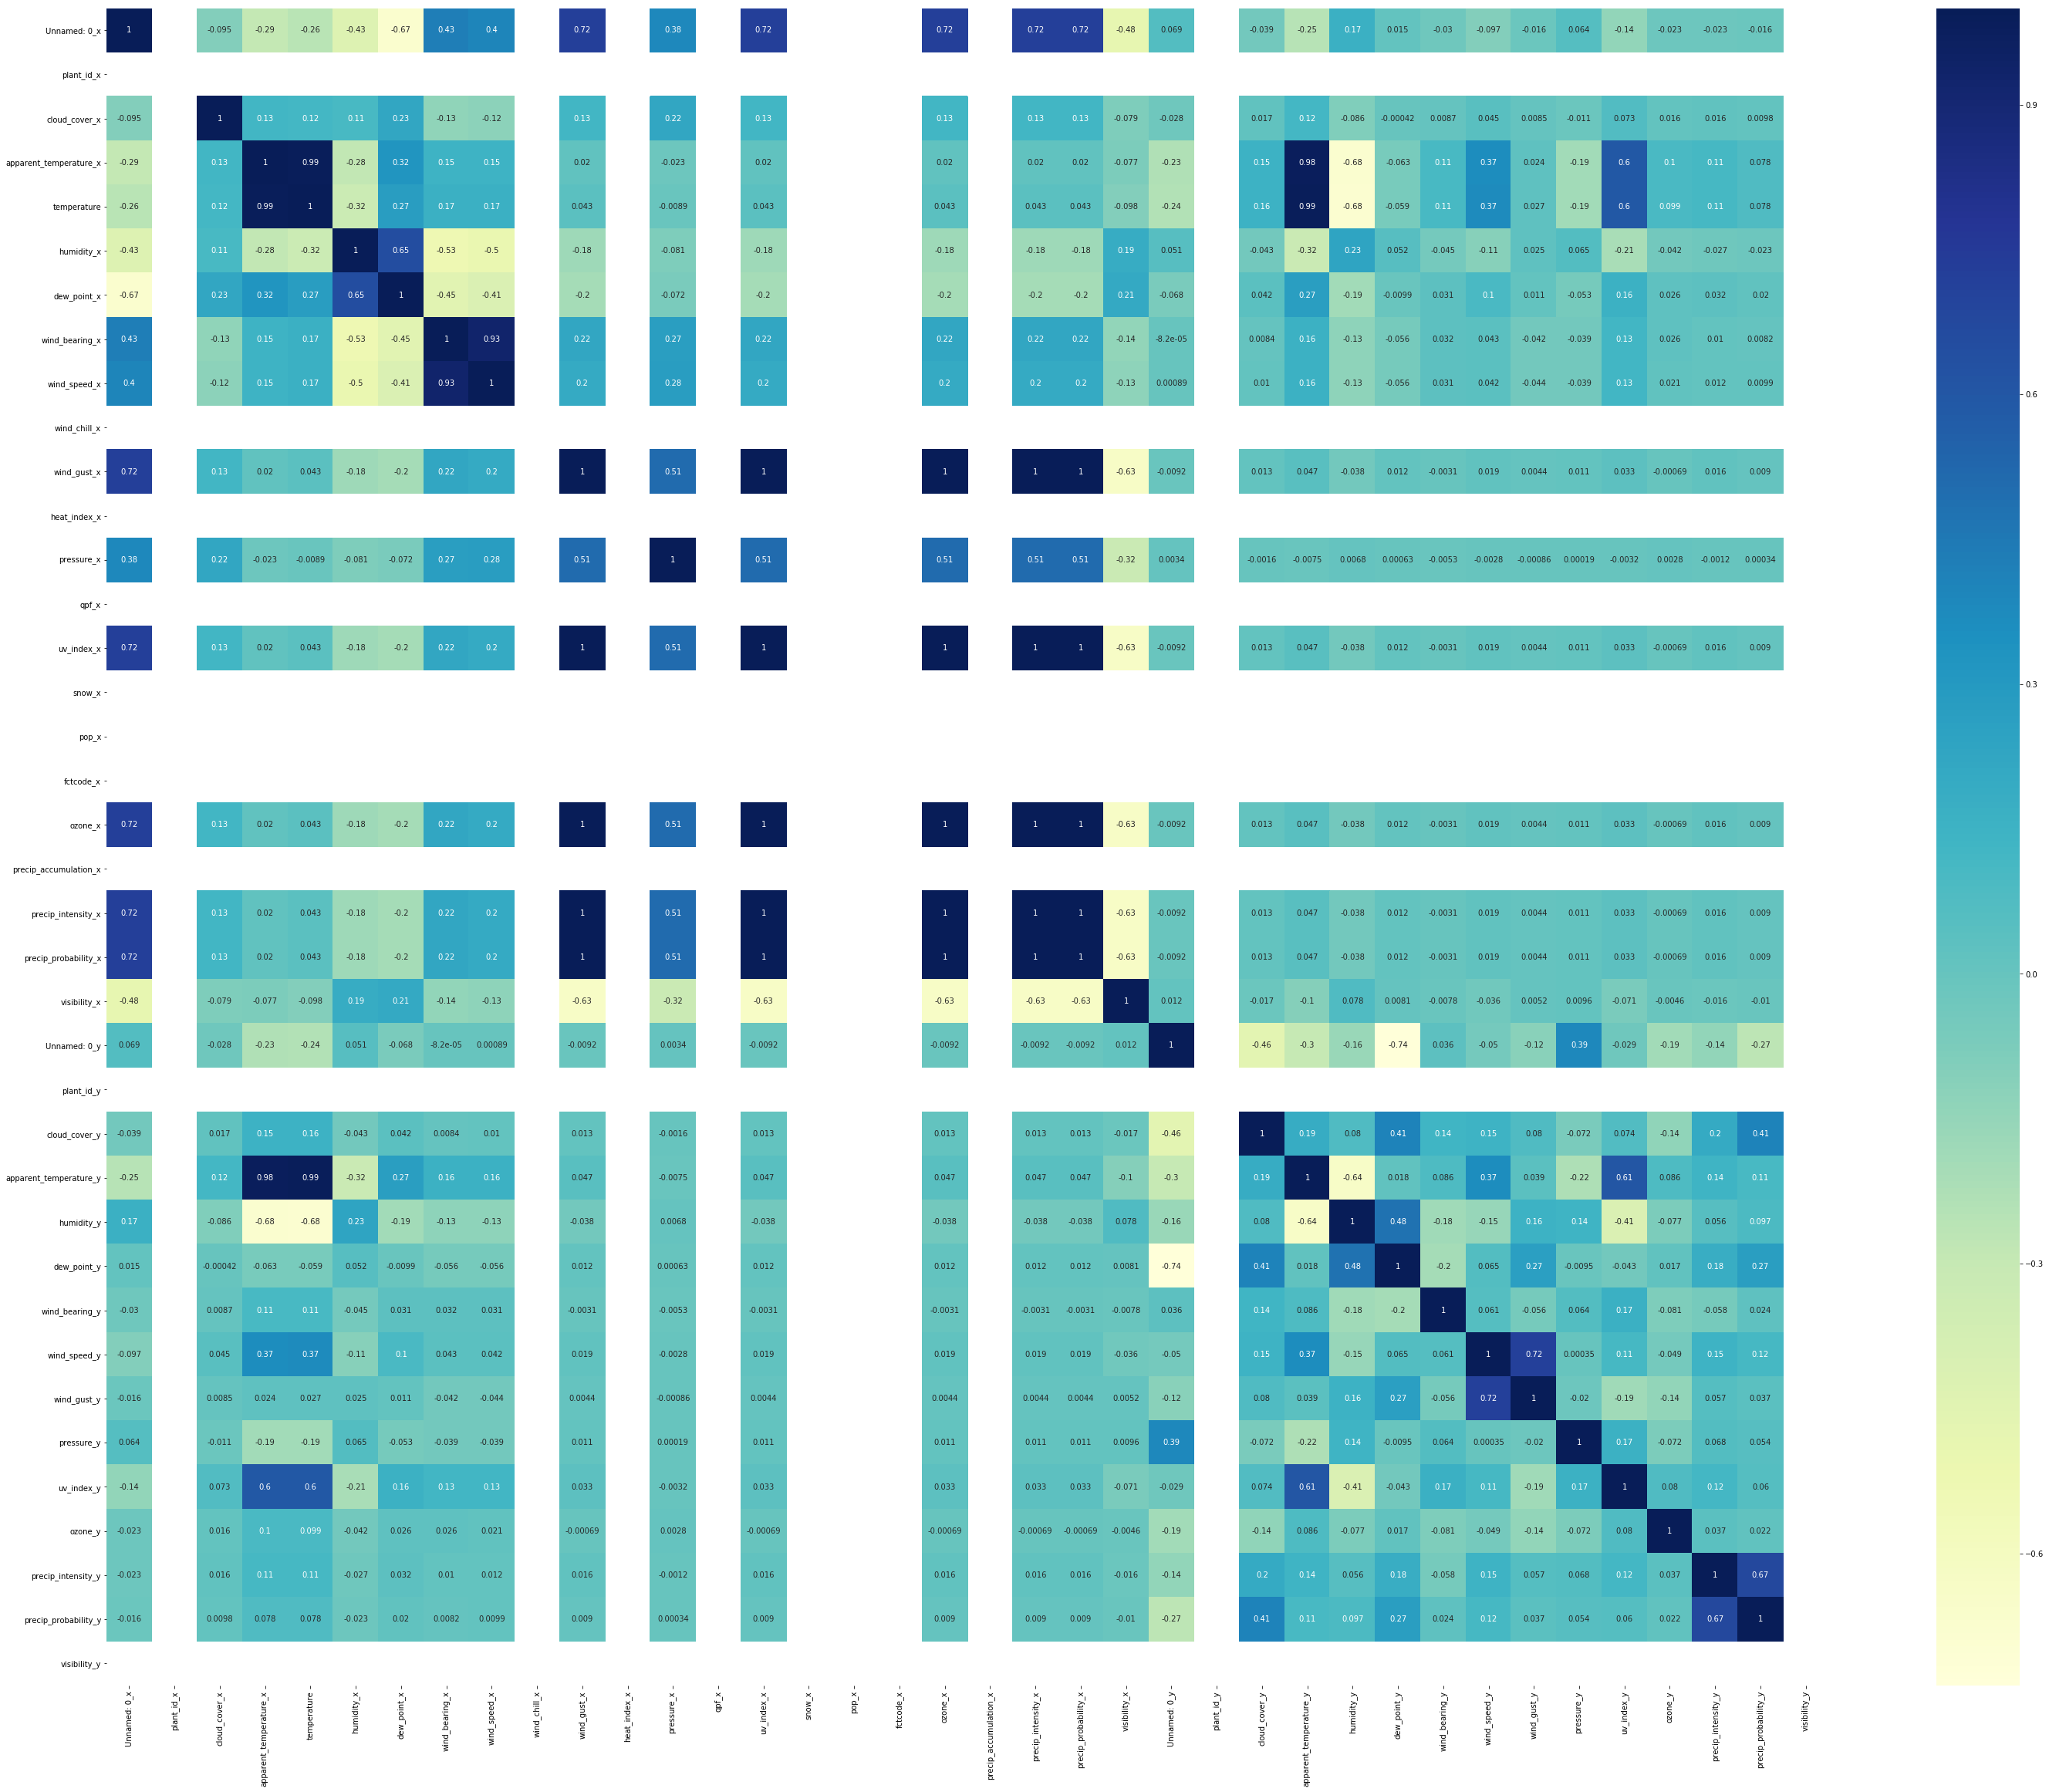

In [97]:
# Check the corelation coefficient to see which variables are highly corelated 

plt.figure(figsize=(50,40))
sns.heatmap(df_train.corr(),annot = True, cmap ="YlGnBu")
plt.show()

### Visualize different close co relation observations mostly impacting on enegry generation

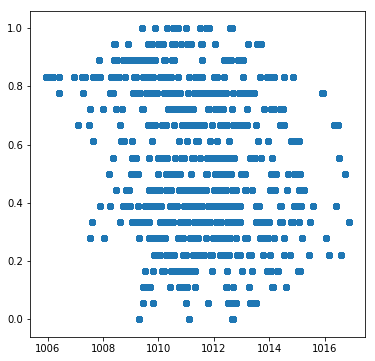

In [107]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.pressure_y, df_train.temperature)
plt.show()

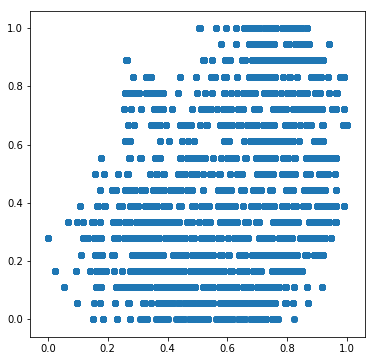

In [110]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.dew_point_x, df_train.temperature)
plt.show()

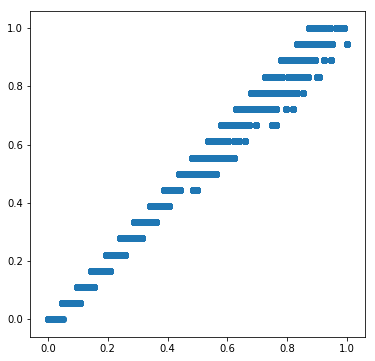

In [111]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.apparent_temperature_x, df_train.temperature)
plt.show()


### Dividing into X and Y sets for the model building 

In [112]:
y_train = df_train.pop('temperature')
X_train = df_train

In [113]:
y_train.head()

47452     0.277778
222586    0.555556
117087    0.388889
255026    0.833333
136102    0.722222
Name: temperature, dtype: float64

In [122]:
# Add a constant

X_train_lm = sm.add_constant(X_train[['dew_point_x']])

# create a first fitted model

lr = sm.OLS(y_train,X_train_lm).fit()

In [123]:
# check the parameters obtained

lr.params

const          0.244312
dew_point_x    0.260452
dtype: float64

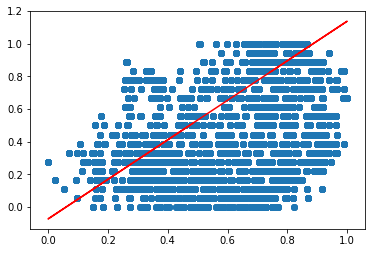

In [124]:
# Visualize the data with a scatter plot and fitted regression line

plt.scatter(X_train_lm.iloc[:,1],y_train)
plt.plot(X_train_lm.iloc[:,1],-0.072+1.210*X_train_lm.iloc[:,1],'r')
plt.show()

In [125]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4062.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:15:40   Log-Likelihood:                 7358.9
No. Observations:               49714   AIC:                        -1.471e+04
Df Residuals:                   49712   BIC:                        -1.470e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2443      0.003     95.639      

In [129]:
# adding another variable

X_train_sm = X_train[['pressure_y','apparent_temperature_x','dew_point_x']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr=sm.OLS(y_train,X_train_sm)

# fit
lr_model=lr.fit()

# params
lr_model.params

const                     0.261674
pressure_y               -0.000249
apparent_temperature_x    1.098790
dew_point_x              -0.048064
dtype: float64

In [130]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.415e+06
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:21:24   Log-Likelihood:             1.1624e+05
No. Observations:               49714   AIC:                        -2.325e+05
Df Residuals:                   49710   BIC:                        -2.324e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2617      0.058      4.527      0.000       0.148       0.375
pressure_y                -0.0002   5.71e-05     -4.364      0.000      -0.000      -0.000
apparent_temperature_x     1.0988      0.001   1944.802      0.000       1.098       1.100
dew_point_x               -0.0481      0.000    -99.481      0.000      -0.049      -0.047
==============================================================================
Omnibus:                    15016.477   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73050.145
Skew:                          -1.389   Prob(JB):                         0.00
Kurtosis:                       8.248   Cond. No.                     5.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
# adding another variable

X_train_sm = X_train[['pressure_y','apparent_temperature_x','dew_point_x','wind_bearing_x']]
X_train_sm = sm.add_constant(X_train_sm)

# Create a  model

lr1=sm.OLS(y_train,X_train_sm)

# fit
lr1_model=lr1.fit()

# params
lr1_model.params

const                     0.269309
pressure_y               -0.000253
apparent_temperature_x    1.100920
dew_point_x              -0.051226
wind_bearing_x           -0.003303
dtype: float64

In [148]:
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.064e+06
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:58:15   Log-Likelihood:             1.1630e+05
No. Observations:               49714   AIC:                        -2.326e+05
Df Residuals:                   49709   BIC:                        -2.325e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2693      0.058      4.664      0.000       0.156       0.382
pressure_y                -0.0003    5.7e-05     -4.438      0.000      -0.000      -0.000
apparent_temperature_x     1.1009      0.001   1837.535      0.000       1.100       1.102
dew_point_x               -0.0512      0.001    -90.267      0.000      -0.052      -0.050
wind_bearing_x            -0.0033      0.000    -10.589      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    14635.510   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70145.070
Skew:                          -1.356   Prob(JB):                         0.00
Kurtosis:                       8.149   Cond. No.                     5.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
X = df [['cloud_cover_x', 'apparent_temperature_x', 'temperature', 'humidity_x',
       'dew_point_x', 'wind_bearing_x', 'wind_speed_x', 'wind_chill_x',
       'wind_gust_x', 'heat_index_x', 'pressure_x', 'qpf_x', 'uv_index_x',
       'snow_x', 'pop_x', 'fctcode_x', 'ozone_x', 'precip_accumulation_x',
       'precip_intensity_x', 'precip_probability_x','visibility_x','plant_id_y','cloud_cover_y', 'apparent_temperature_y',
       'humidity_y', 'dew_point_y', 'wind_bearing_y', 'wind_speed_y',
       'wind_gust_y', 'pressure_y', 'uv_index_y', 'ozone_y',
       'precip_intensity_y', 'visibility_y']]

y = df['temperature']

In [157]:
X =sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:            temperature   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.689e+22
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:15:43   Log-Likelihood:             1.3807e+06
No. Observations:               71021   AIC:                        -2.761e+06
Df Residuals:                   70995   BIC:                        -2.761e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
cloud_cover_x           1.09

In [158]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [159]:
df.columns

Index(['Unnamed: 0_x', 'plant_id_x', 'datetime_utc_x', 'datetime_local_x',
       'cloud_cover_x', 'apparent_temperature_x', 'temperature', 'humidity_x',
       'dew_point_x', 'wind_bearing_x', 'wind_speed_x', 'wind_chill_x',
       'wind_gust_x', 'heat_index_x', 'pressure_x', 'qpf_x', 'uv_index_x',
       'snow_x', 'pop_x', 'fctcode_x', 'ozone_x', 'precip_accumulation_x',
       'precip_intensity_x', 'precip_probability_x', 'precip_type_x',
       'visibility_x', 'sunrise_x', 'sunset_x', 'icon_x', 'summary_x',
       'updated_at_x', 'Unnamed: 0_y', 'plant_id_y', 'datetime_utc_y',
       'datetime_local_y', 'cloud_cover_y', 'apparent_temperature_y',
       'humidity_y', 'dew_point_y', 'wind_bearing_y', 'wind_speed_y',
       'wind_gust_y', 'pressure_y', 'uv_index_y', 'ozone_y',
       'precip_intensity_y', 'precip_probability_y', 'visibility_y',
       'sunrise_y', 'sunset_y', 'icon_y', 'summary_y', 'updated_at_y'],
      dtype='object')

### Predication on Linear Model

In [160]:
X = df [['cloud_cover_x', 'apparent_temperature_x', 'temperature', 'humidity_x',
       'dew_point_x', 'wind_bearing_x', 'wind_speed_x', 'wind_chill_x',
       'wind_gust_x', 'heat_index_x', 'pressure_x', 'qpf_x', 'uv_index_x',
       'snow_x', 'pop_x', 'fctcode_x', 'ozone_x', 'precip_accumulation_x',
       'precip_intensity_x', 'precip_probability_x','visibility_x','plant_id_y','cloud_cover_y', 'apparent_temperature_y',
       'humidity_y', 'dew_point_y', 'wind_bearing_y', 'wind_speed_y',
       'wind_gust_y', 'pressure_y', 'uv_index_y', 'ozone_y',
       'precip_intensity_y', 'visibility_y']]

X = sm.add_constant(X)
predicated_views = lm_3.predict(X)

In [163]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df.temperature, predicated_views)
r_squared = r2_score(df.temperature, predicated_views)

### Calculate the R Square and Mean Square Error

In [164]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.610357512018668e-19
r_square_value : 1.0


### Residual Analysis on final model

In [166]:
y_train_temperature = lm_3.predict(X)

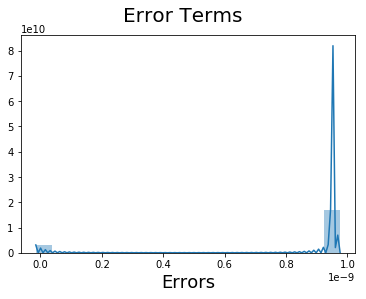

In [168]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_train_temperature), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Save updated dataset

In [173]:
df.to_csv('df.csv')